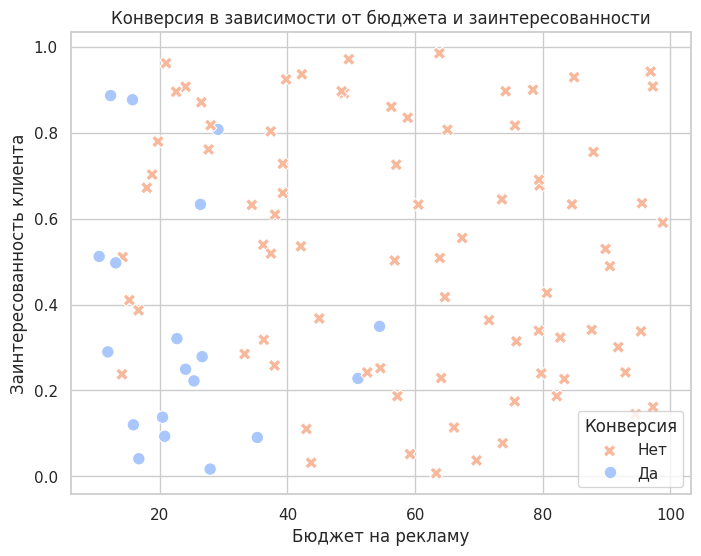

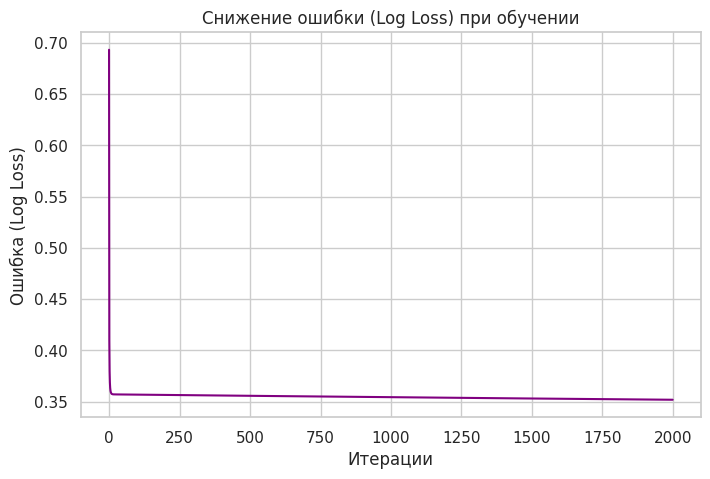

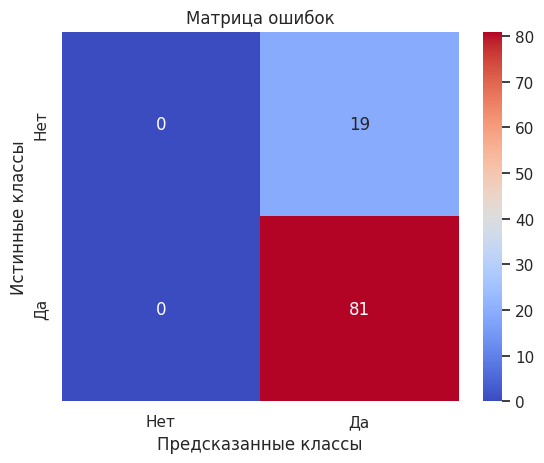

              precision    recall  f1-score   support

         Нет       0.00      0.00      0.00        19
          Да       0.81      1.00      0.90        81

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Генерация синтетических данных с дополнительным признаком
np.random.seed(42)
n_samples = 100
advertising_budget = np.random.uniform(10, 100, n_samples)  # Бюджет на рекламу
user_interest = np.random.uniform(0, 1, n_samples)          # Заинтересованность клиента
purchase_frequency = np.random.uniform(0, 1, n_samples)     # Частота покупок

# Вероятность конверсии с учетом дополнительных признаков
probability_conversion = 1 / (1 + np.exp(-0.05 * advertising_budget - 2 * user_interest + 1.5 * purchase_frequency + 0.5))
conversion = np.random.binomial(1, probability_conversion)

# Визуализация данных с помощью Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=advertising_budget, y=user_interest, hue=conversion, style=conversion, palette="coolwarm", s=80)
plt.title('Конверсия в зависимости от бюджета и заинтересованности')
plt.xlabel('Бюджет на рекламу')
plt.ylabel('Заинтересованность клиента')
plt.legend(title='Конверсия', labels=['Нет', 'Да'])
plt.show()

# Функции для логистической регрессии с регуляризацией и градиентного спуска
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    return sigmoid(np.dot(X, w))

def log_loss(y_true, y_pred, w, reg_strength=0.01):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) + reg_strength * np.sum(w**2)

def gradient_descent(X, y, lr=0.001, n_iterations=2000, reg_strength=0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_history = []

    for i in range(n_iterations):
        y_pred = predict(X, w)
        grad = np.dot(X.T, (y_pred - y)) / n_samples + 2 * reg_strength * w
        w -= lr * grad
        loss = log_loss(y, y_pred, w, reg_strength)
        loss_history.append(loss)

    return w, loss_history

# Подготовка данных и обучение модели
X = np.column_stack((np.ones(n_samples), advertising_budget, user_interest, purchase_frequency))  # добавляем смещение
w, loss_history = gradient_descent(X, conversion)

# Визуализация процесса обучения (снижение ошибки) с Seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(len(loss_history)), y=loss_history, color='purple')
plt.title('Снижение ошибки (Log Loss) при обучении')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (Log Loss)')
plt.grid(True)
plt.show()

# Предсказания и оценка модели
predicted_probs = predict(X, w)
predicted_classes = (predicted_probs >= 0.5).astype(int)

# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(conversion, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm", xticklabels=['Нет', 'Да'], yticklabels=['Нет', 'Да'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

# Отчёт о классификации
print(classification_report(conversion, predicted_classes, target_names=['Нет', 'Да']))
